# Project 1: SAT & ACT Analysis

## Problem Statement

This intend of this project is to analyze **SAT** and **ACT** scores by state, as well as the student participation rates for the year 2017 and 2018 to answer the following questions:

- Data error analysis
  - To check through the entire dataset and compare with the official web
  - Correct errors if there are any spotted
- Investigate trends in data
  - Finding out states with the highest and lowest participation rates for 2017/2018 SAT/ACT
  - Finding out states with the highest and lowest mean total and composite scores for 2017/2018 SAT/ACT
  - Finding out if there are states with 100% participation on a give test have a rate change year-to-year
  - Finding out if there are states with more than 50% participation on either year
  - Finding out if there are possible relations between scores and participation rate
- Recommendations
  - Suggest how College Board might increase participation for state with low participation rates

## Executive Summary

- Errors such as extra characters appearing in mean score were found and removed
- Percentages in participation column were removed and converted to integer
- State with lowest participation rates
  - 2017 ACT : **Maine** (8%)
  - 2018 ACT : **Maine** (7%)
  - 2017 SAT : **North** **Dakota** (2%)
  - 2018 SAT : **North** **Dakota** (2%)
- States with highest participation rates
  - 2017 ACT : **Colorado**, **Alabama**, **Kentucky**, **Wisconsin**, **Utah** ... (100%)
  - 2018 ACT : **Missouri**, **Alabama**, **Kentucky**, **Wisconsin**, **Utah** ... (100%)
  - 2017 SAT : **District of Columbia**, **Michigan**, **Connecticut**, **Delaware**, **New Hampshire** (100%)
  - 2018 SAT : **Colorado**, **Connecticut**, **Delaware**, **Michigan**, **Idaho** (100%)
- State with highest mean total/composite scores
  - 2017 ACT :  **New Hampshire** (25.5)
  - 2018 ACT :  **Connecticut** (25.6)
  - 2017 SAT :  **District of Columbia** (950)
  - 2018 SAT :  **District of Columbia** (977)
- State with lowest mean total/composite scores
  - 2017 ACT : **Nevada** (17.8)
  - 2018 ACT : **Nevada** (17.7)
  - 2017 SAT : **Minnesota** (1295)
  - 2018 SAT : **Minnesota** (1298)
- State with 100% participation on given test rate that changed year-to-year:  **Colorado** and **Illinois**  have around 80% increase from previous year participation rate
- States with more than 50% participation on both years : **Florida**, **Georgia**, **Hawaii**, **North Carolina**, **South Carolina**
- Histograms, boxplots, heatmaps, scatterplots, line plots were used as visualizations
- Strong negative relationship between test participation and average test score is found. States with lower participation rates likely to see higher average scores than a state with higher participation rates on that same test
- The distribution for ACT participation rates are skewed left and the distribution for SAT participation rates are skewed right for both years. ACT participation is higher than SAT.

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import json
from scipy import stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Load in data
df_sat_2017 = pd.read_csv('../data/sat_2017.csv')
df_act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
df_sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
df_act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

##### Answer: 
   
- For sat_2107, the data shows the average ERW (Evidence-Based Reading and Writing), math score and their sum for each state, ordered alphabetically.

- For  act_2017, the data shows the participation percentage, the average English, Math, Reading and Science score, as well as their composite score for each state, ordered alphabetically. The composite score should be the average score of the 4 different categories.

#### 4a. Does the data look complete? 

###### Answer:  
- The data looks complete with data filled up.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

###### Answer:

- No obvious issues with the observations

- SAT minimum possible value for each test is 200, maximum possible value for each test is 800
- ACT minimum possible value for each test is 1, maximum possible value for each test is 36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
df_sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
# Filter rows with score more than maximum possible value (800) or less than minimum possible value (200)
sat_2017_errors = df_sat_2017[(~df_sat_2017['Evidence-Based Reading and Writing'].between(200,800)) |
                              (~df_sat_2017['Math'].between(200,800))]
sat_2017_errors 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


Looks like Maryland had error in the Math score as it is lesser then the minimum possible value of 200

In [7]:
# Replace the Math value of Maryland to the actual value which is 524
df_sat_2017.at[df_sat_2017['State'] == 'Maryland', 'Math'] = 524

In [8]:
df_sat_2017[df_sat_2017['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [9]:
df_sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [10]:
df_act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


The minimum value for science is abnormally low. After comparing with the source, the mean science score is actually 23.2.

In [11]:
act_2017_errors = df_act_2017[(df_act_2017['Science'] < 5)]

In [12]:
act_2017_errors

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [13]:
# Set the correct value back
df_act_2017.at[df_act_2017['State'] == 'Maryland', 'Science'] = 23.2

In [14]:
df_act_2017[df_act_2017['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [15]:
df_act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


Data looks fine now 

#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
df_sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [17]:
df_act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

###### Answer:
    - act_2017 column Composite seems odd
    - Composite should be a float type as it is the average of the other 4 test
    - Participation rates should be float type as it is a percentage

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
def percentage_to_float(p):
    return int(p.strip('%'))

In [19]:
df_act_2017['Participation'] = df_act_2017['Participation'].apply(percentage_to_float)
df_sat_2017['Participation'] = df_sat_2017['Participation'].apply(percentage_to_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
# Function to convert string intergers to float
def string_to_float(p):
    return float(p)

In [21]:
# df_act_2017['Composite'] = df_act_2017['Composite'].apply(string_to_float)
# Running this cells throws an error because there is a value which has char in the string and cannot be converted to float

In [22]:
# Function to check if value can be converted to float
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [23]:
# Find out which row cannot be converted to float
df_act_2017[~df_act_2017['Composite'].apply(isfloat)]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2x


In [24]:
df_act_2017.at[df_act_2017['State'] == 'Wyoming', 'Composite'] = 20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [25]:
df_act_2017['Composite'] = df_act_2017['Composite'].apply(string_to_float)

- Display the data types again to confirm they are correct.

In [26]:
df_act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [27]:
df_sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [28]:
df_sat_2017.rename(columns={
    'State': 'state',
    'Participation': 'sat_2017_participation',
    'Evidence-Based Reading and Writing': 'sat_2017_reading_writing',
    'Math' : 'sat_2017_math',
    'Total': 'sat_2017_total'
},
                   inplace = True)

In [29]:
df_sat_2017.columns

Index(['state', 'sat_2017_participation', 'sat_2017_reading_writing',
       'sat_2017_math', 'sat_2017_total'],
      dtype='object')

In [30]:
df_act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [31]:
df_act_2017.rename(columns={
    'State': 'state',
    'Participation': 'act_2017_participation',
    'English': 'act_2017_english',
    'Math' : 'act_2017_math',
    'Reading' : 'act_2017_reading',
    'Science' : 'act_2017_science',
    'Composite' : 'act_2017_composite'

},
                   inplace = True)

In [32]:
df_act_2017.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

Data Dictonary:

| Feature                      | Type      | Dataset   | Description                                                  |
| ---------------------------- | --------- | --------- | ------------------------------------------------------------ |
| **state**                    | *object*  | ACT / SAT | The states in the United States of America                   |
| **act_2017_participation**   | *int64*   | ACT       | The percentage of students that took ACT 2017 ranging from 0 to 100 |
| **act_2017_english**         | *float64* | ACT       | Mean ACT 2017 English score of each state ranging from 1 to 36 |
| **act_2017_math**            | *float64* | ACT       | Mean ACT 2017 Math score ranging from 1 to 36                |
| **act_2017_reading**         | *float64* | ACT       | Mean ACT 2017 Reading score ranging from 1 to 36             |
| **act_2017_science**         | *float64* | ACT       | Mean ACT 2017 Science score ranging from 1 to 36             |
| **act_2017_composite**       | *float64* | ACT       | Mean composite score calculated by averaging the 4 other ACT 2017 scores ranging from 1 to 36 |
| **sat_2017_participation**   | *int64*   | SAT       | The percentage of students that took SAT 2017 ranging from 0 to 100 |
| **sat_2017_reading_writing** | *int64*   | SAT       | Mean SAT 2017 Reading and Writing score ranging from 200 to 800 |
| **sat_2017_math**            | *int64*   | SAT       | Mean SAT 2017 Math score ranging from 200 to 800             |
| **sat_2017_total**           | *int64*   | SAT       | Total score calculated by adding the other 2 SAT 2017 scores ranging from 400 to 1600 |
| **act_2018_participation**   | *int64*   | ACT       | The percentage of students that took ACT 2018 ranging from 0 to 100 |
| **act_2018_english**         | *float64* | ACT       | Mean ACT 2018 English score of each state ranging from 1 to 36 |
| **act_2018_math**            | *float64* | ACT       | Mean ACT 2018 Math score ranging from 1 to 36                |
| **act_2018_reading**         | *float64* | ACT       | Mean ACT 2018 Reading score ranging from 1 to 36             |
| **act_2018_science**         | *float64* | ACT       | Mean ACT 2018 Science score ranging from 1 to 36             |
| **act_2018_composite**       | *float64* | ACT       | Mean composite score calculated by averaging the 4 other ACT 2018 scores ranging from 1 to 36 |
| **sat_2018_participation**   | *int64*   | SAT       | The percentage of students that took SAT 2018 ranging from 0 to 100 |
| **sat_2018_reading_writing** | *int64*   | SAT       | Mean SAT 2018 Reading and Writing score ranging from 200 to 800 |
| **sat_2018_math**            | *int64*   | SAT       | Mean SAT 2018 Math score ranging from 200 to 800             |
| **sat_2018_total**           | *int64*   | SAT       | Total score calculated by adding the other 2 SAT 2018 scores ranging from 400 to 1600 |
| **state_code**               | *object*  | ACT / SAT | Code of the states in United States of America.              |


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [33]:
#code
df_act_2017.drop(0, axis=0, inplace = True)

In [34]:
df_act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [35]:
#Code:
combined_2017_df = pd.merge(df_act_2017, df_sat_2017, how='left')

In [36]:
combined_2017_df.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [37]:
#code
combined_2017_df.to_csv('../data/combined_2017.csv', index = False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [38]:
# Load in data
df_sat_2018 = pd.read_csv('../data/sat_2018.csv')
df_act_2018 = pd.read_csv('../data/act_2018.csv')

In [39]:
df_sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [40]:
df_act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [41]:
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [42]:
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [43]:
df_sat_2018['Participation'] = df_sat_2018['Participation'].apply(percentage_to_float)

In [44]:
df_sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [45]:
df_act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


Describe and info data to see if there are any potential errors 

In [46]:
df_sat_2018.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [47]:
df_act_2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [48]:
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [49]:
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [50]:
df_sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [51]:
df_sat_2018.rename(columns={
    'State': 'state',
    'Participation': 'sat_2018_participation',
    'Evidence-Based Reading and Writing': 'sat_2018_reading_writing',
    'Math' : 'sat_2018_math',
    'Total': 'sat_2018_total'
},
                   inplace = True)

In [52]:
df_sat_2018.columns

Index(['state', 'sat_2018_participation', 'sat_2018_reading_writing',
       'sat_2018_math', 'sat_2018_total'],
      dtype='object')

In [53]:
df_act_2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [54]:
df_act_2018.rename(columns={
    'State': 'state',
    'Percentage of Students Tested': 'act_2018_participation',
    'Average English Score': 'act_2018_english',
    'Average Math Score' : 'act_2018_math',
    'Average Reading Score' : 'act_2018_reading',
    'Average Science Score' : 'act_2018_science',
    'Average Composite Score' : 'act_2018_composite'

},
                   inplace = True)

In [55]:
# Shift composite to the last column
cols = list(df_act_2018.columns)
cols.append(cols.pop(2)) 

In [56]:
df_act_2018 = df_act_2018[cols]

In [57]:
df_act_2018.columns

Index(['state', 'act_2018_participation', 'act_2018_english', 'act_2018_math',
       'act_2018_reading', 'act_2018_science', 'act_2018_composite'],
      dtype='object')

In [58]:
combined_2018_df = pd.merge(df_act_2018, df_sat_2018, how='left')

In [59]:
combined_2018_df.head()

,state,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100,18.9,18.3,19.6,19.0,19.1,6,595,571,1166
1,Alaska,33,19.8,20.6,21.6,20.7,20.8,43,562,544,1106
2,Arizona,66,18.2,19.4,19.5,19.2,19.2,29,577,572,1149
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4,5,592,576,1169
4,California,27,22.5,22.5,23.0,22.1,22.7,60,540,536,1076


In [60]:
combined_2017_df.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [61]:
final = pd.merge(combined_2017_df, combined_2018_df, how='left')

In [62]:
final.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,...,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,18.9,18.3,19.6,19.0,19.1,6,595,571,1166
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,...,33,19.8,20.6,21.6,20.7,20.8,43,562,544,1106
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,...,66,18.2,19.4,19.5,19.2,19.2,29,577,572,1149
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,...,100,19.1,18.9,19.7,19.4,19.4,5,592,576,1169
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,...,27,22.5,22.5,23.0,22.1,22.7,60,540,536,1076


In [63]:
final.to_csv('../data/final.csv', index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [64]:
#Code:
final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [65]:
def calc_sd(data_lst):
    n = len(data_lst)
    average = sum(data_lst) / n
    return (sum([(x-average) ** 2 for x in data_lst]) / n) ** 0.5


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [66]:
{col: calc_sd(final[col].values) for col in final if col != 'state'}

{'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 34.92907076664508,
 'sat_2017_reading_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 33.745194881997506,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'act_2018_composite': 2.0855261815801147,
 'sat_2018_participation': 36.946619223539415,
 'sat_2018_reading_writing': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

In [67]:
np.std(final['act_2017_math'].values)

1.9624620273436781

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

###### Answer :
The manually calculated standard deviations does not match up with the ouput from pandas describe.The manually calculated standard deviation is the same as numpy's std method. Pandas describe uses N-1 in the denominator whereas numpy uses N in the denominator. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [68]:
final.sort_values('sat_2017_participation')[['state', 'sat_2017_participation']].head(5)

,state,sat_2017_participation
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3


State with lowest SAT 2017 participation

In [69]:
final.sort_values('sat_2017_participation', ascending=False)[['state', 'sat_2017_participation']].head()

,state,sat_2017_participation
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96


States with highest SAT 2018 participation

In [70]:
final.sort_values('sat_2018_participation')[['state', 'sat_2018_participation']].head() 

,state,sat_2018_participation
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3


States with lowest SAT 2018 participation

In [71]:
final.sort_values('sat_2018_participation', ascending=False)[['state', 'sat_2018_participation']].head(7) 

,state,sat_2018_participation
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100
19,Maine,99
13,Illinois,99


States with highest SAT 2018 participation

In [72]:
final.sort_values('act_2017_participation')[['state', 'act_2017_participation']].head() 

,state,act_2017_participation
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23


States with lowest ACT 2017 participation

In [73]:
final.sort_values('act_2017_participation', ascending=False)[['state', 'act_2017_participation']].head(20) 

,state,act_2017_participation
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
33,North Carolina,100
28,Nevada,100
26,Montana,100


States with highest ACT 2017 participation

In [74]:
final.sort_values('act_2018_participation')[['state', 'act_2018_participation']].head() 

,state,act_2018_participation
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


States with lowest ACT 2018 participation

In [75]:
final.sort_values('act_2018_participation', ascending=False)[['state', 'act_2018_participation']].head(20) 

,state,act_2018_participation
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


States with highest ACT 2018 participation

In [76]:
final[['act_2017_composite','act_2018_composite','sat_2017_total','sat_2017_total']].describe()

,act_2017_composite,act_2018_composite,sat_2017_total,sat_2017_total
count,51.000000,51.000000,51.000000,51.000000
mean,21.519608,21.486275,1126.098039,1126.098039
std,2.020695,2.106278,92.494812,92.494812
min,17.800000,17.700000,950.000000,950.000000
25%,19.800000,19.950000,1055.500000,1055.500000
50%,21.400000,21.300000,1107.000000,1107.000000
75%,23.600000,23.550000,1212.000000,1212.000000
max,25.500000,25.600000,1295.000000,1295.000000


In [77]:
final.sort_values('act_2017_composite' , ascending = False).head()[['state','act_2017_composite','act_2018_composite','sat_2017_total','sat_2017_total']]

,state,act_2017_composite,act_2018_composite,sat_2017_total,sat_2017_total
29,New Hampshire,25.5,25.1,1052,1052
21,Massachusetts,25.4,25.5,1107,1107
6,Connecticut,25.2,25.6,1041,1041
19,Maine,24.3,24.0,1012,1012
8,District of Columbia,24.2,23.6,950,950


In [78]:
print('act_2017_composite MINIMUM: ')
print(final.loc[final['act_2017_composite'].idxmin()][['state','act_2017_composite']])
print('')
print('act_2017_composite MAXIMUM: ')
print(final.loc[final['act_2017_composite'].idxmax()][['state','act_2017_composite']])

act_2017_composite MINIMUM: 
state                 Nevada
act_2017_composite      17.8
Name: 28, dtype: object

act_2017_composite MAXIMUM: 
state                 New Hampshire
act_2017_composite             25.5
Name: 29, dtype: object


In [79]:
print('act_2018_composite MINIMUM: ')
print(final.loc[final['act_2018_composite'].idxmin()][['state','act_2018_composite']])
print('')
print('act_2018_composite MAXIMUM: ')
print(final.loc[final['act_2018_composite'].idxmax()][['state','act_2018_composite']])


act_2018_composite MINIMUM: 
state                 Nevada
act_2018_composite      17.7
Name: 28, dtype: object

act_2018_composite MAXIMUM: 
state                 Connecticut
act_2018_composite           25.6
Name: 6, dtype: object


In [80]:
print('sat_2017_total MINIMUM: ')
print(final.loc[final['sat_2017_total'].idxmin()][['state','sat_2017_total']])
print('')
print('sat_2017_total MAXIMUM: ')
print(final.loc[final['sat_2017_total'].idxmax()][['state','sat_2017_total']])

sat_2017_total MINIMUM: 
state             District of Columbia
sat_2017_total                     950
Name: 8, dtype: object

sat_2017_total MAXIMUM: 
state             Minnesota
sat_2017_total         1295
Name: 23, dtype: object


In [81]:
print('sat_2018_total MINIMUM: ')
print(final.loc[final['sat_2018_total'].idxmin()][['state','sat_2018_total']])
print('')
print('sat_2018_total MAXIMUM: ')
print(final.loc[final['sat_2018_total'].idxmax()][['state','sat_2018_total']])

sat_2018_total MINIMUM: 
state             District of Columbia
sat_2018_total                     977
Name: 8, dtype: object

sat_2018_total MAXIMUM: 
state             Minnesota
sat_2018_total         1298
Name: 23, dtype: object


In [82]:
# Filter states with 100% act participation
final[final['act_2017_participation'] > 90][['state','act_2017_participation', 'act_2018_participation']]

,state,act_2017_participation,act_2018_participation
0,Alabama,100,100
3,Arkansas,100,100
5,Colorado,100,30
13,Illinois,93,43
17,Kentucky,100,100
18,Louisiana,100,100
23,Minnesota,100,99
24,Mississippi,100,100
25,Missouri,100,100
26,Montana,100,100


Colorado is interesting as it has a 70% decrease from previous year participation rate
Illinois is interesting as well as it has a 50% decrease from previous year participation rate

In [83]:
final[['state','sat_2017_participation', 'sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
0,Alabama,5,6
1,Alaska,38,43
2,Arizona,30,29
3,Arkansas,3,5
4,California,53,60
5,Colorado,11,100
6,Connecticut,100,100
7,Delaware,100,100
8,District of Columbia,100,92
9,Florida,83,56


In [84]:
final[final['sat_2017_participation'] >90][['state','sat_2017_participation', 'sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
6,Connecticut,100,100
7,Delaware,100,100
8,District of Columbia,100,92
12,Idaho,93,100
19,Maine,95,99
22,Michigan,100,100
29,New Hampshire,96,96


In [85]:
final[final['act_2017_participation'] < 50][['state','act_2017_participation', 'act_2018_participation']]

,state,act_2017_participation,act_2018_participation
4,California,31,27
6,Connecticut,31,26
7,Delaware,18,17
8,District of Columbia,32,32
12,Idaho,38,36
14,Indiana,35,32
19,Maine,8,7
20,Maryland,28,31
21,Massachusetts,29,25
22,Michigan,29,22


In [86]:
final[(final['sat_2017_participation'] < 50) & (final['sat_2018_participation'] > 90)][['state','sat_2017_participation', 'sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
5,Colorado,11,100
13,Illinois,9,99


Colorado, Illinois is interesting as it has around 80% increase from previous year participation rate

In [87]:
final[(final['sat_2017_participation'] > 50) & (final['act_2017_participation'] > 50) | 
      (final['sat_2018_participation'] > 50) & (final['act_2018_participation'] > 50) ][['state','sat_2017_participation', 'sat_2018_participation', 'act_2017_participation','act_2018_participation']]


,state,sat_2017_participation,sat_2018_participation,act_2017_participation,act_2018_participation
9,Florida,83,56,73,66
10,Georgia,61,70,55,53
11,Hawaii,55,56,90,89
33,North Carolina,49,52,100,100
40,South Carolina,50,55,100,100


All these states have more than 50% participation rate for both SAT and ACT for both years.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

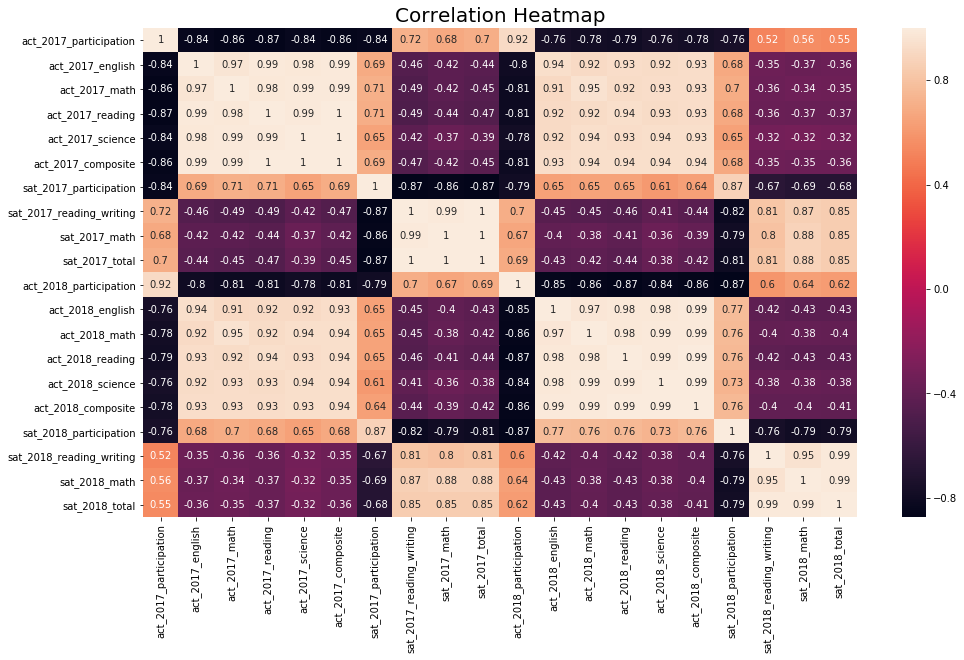

In [88]:
plt.figure(figsize=(16,9))
sns.heatmap(final.corr(), annot=True)
plt.title('Correlation Heatmap', size = 20);

From the heatmap, we observe that there is a strong negative relationship between test participation and average test score. States with lower participation rates likely to see higher average scores than a state with higher participation rates on that same test.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [89]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, xlabel):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,14)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=10)
        ax[i].set_title(list_of_titles[i])
        ax[i].set_ylabel('Number of states')
        ax[i].set_xlabel(xlabel)
        ax[i].axvline(np.mean(dataframe[column]), color='black', linestyle='--', lw=3);



#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

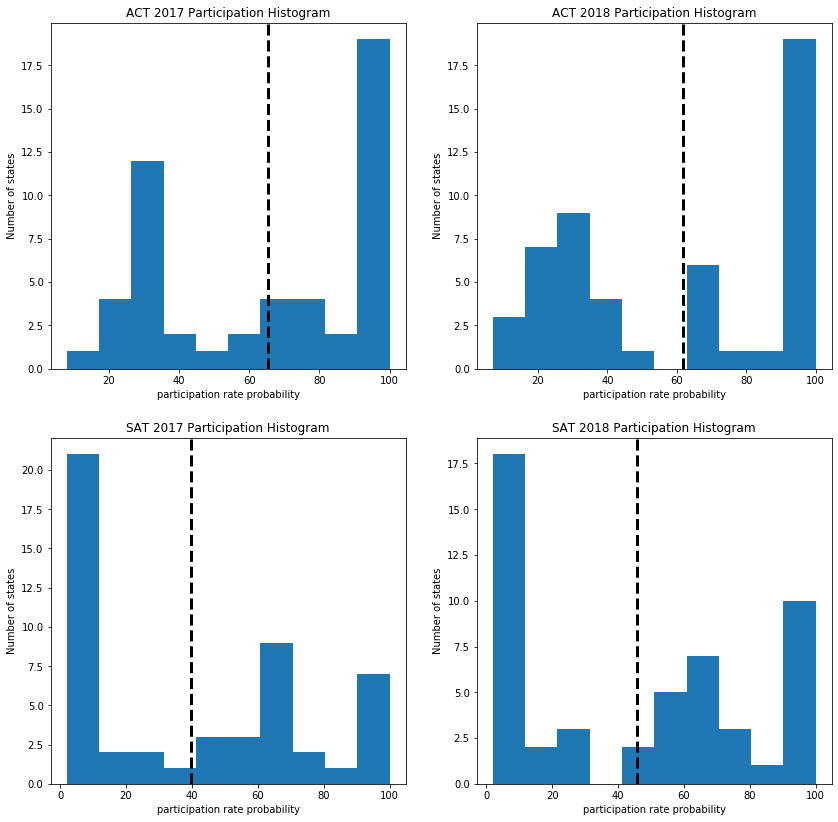

In [90]:
participation_list_col = ['act_2017_participation','act_2018_participation','sat_2017_participation','sat_2018_participation']
participation_list_titles = ['ACT 2017 Participation Histogram','ACT 2018 Participation Histogram','SAT 2017 Participation Histogram','SAT 2018 Participation Histogram']
subplot_histograms(final, 
                   participation_list_col,
                   participation_list_titles,
                   'participation rate probability')

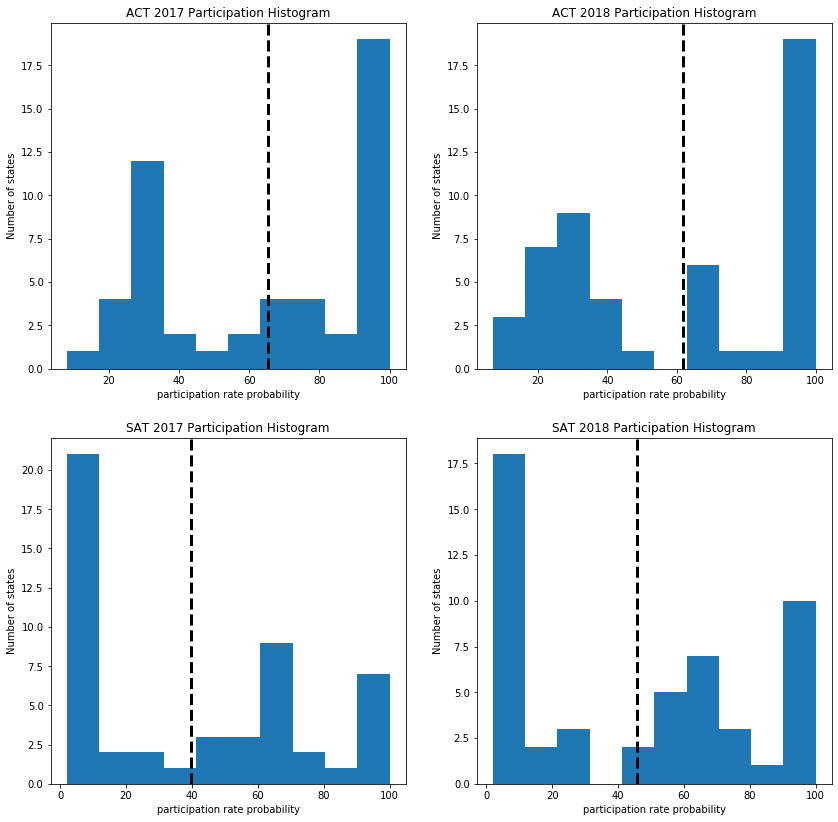

In [91]:
# participation rates
participation_list_col = ['act_2017_participation','act_2018_participation','sat_2017_participation','sat_2018_participation']
participation_list_titles = ['ACT 2017 Participation Histogram','ACT 2018 Participation Histogram','SAT 2017 Participation Histogram','SAT 2018 Participation Histogram']
subplot_histograms(final, 
                   participation_list_col,
                   participation_list_titles,
                   'participation rate probability')

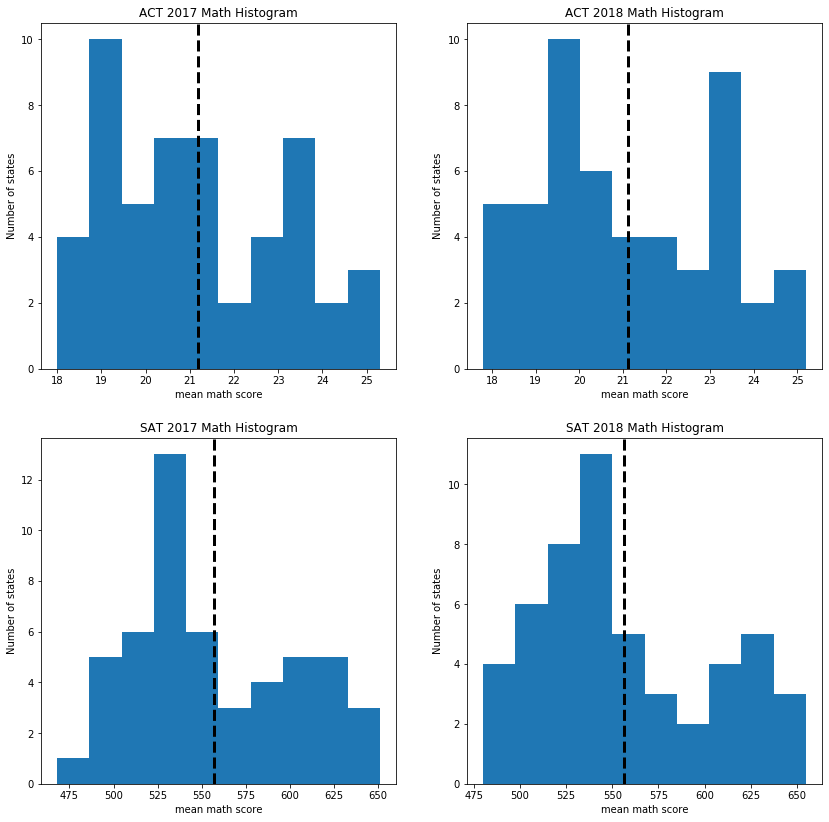

In [92]:
# math sat & act
participation_list_col = ['act_2017_math','act_2018_math','sat_2017_math','sat_2018_math']
participation_list_titles = ['ACT 2017 Math Histogram','ACT 2018 Math Histogram','SAT 2017 Math Histogram','SAT 2018 Math Histogram']
subplot_histograms(final, 
                   participation_list_col,
                   participation_list_titles,
                   'mean math score')

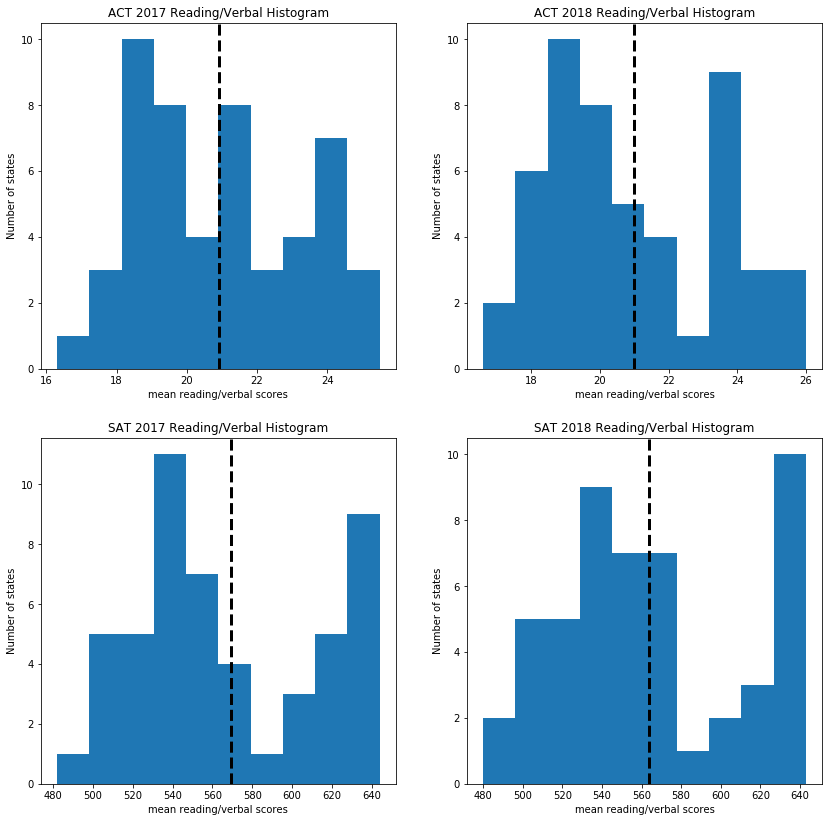

In [93]:
# math sat & act
# reading/verbal scores sat & act
participation_list_col = ['act_2017_english','act_2018_english','sat_2017_reading_writing','sat_2018_reading_writing']
participation_list_titles = ['ACT 2017 Reading/Verbal Histogram','ACT 2018 Reading/Verbal Histogram','SAT 2017 Reading/Verbal Histogram','SAT 2018 Reading/Verbal Histogram']
subplot_histograms(final, 
                   participation_list_col,
                   participation_list_titles,
                   'mean reading/verbal scores')

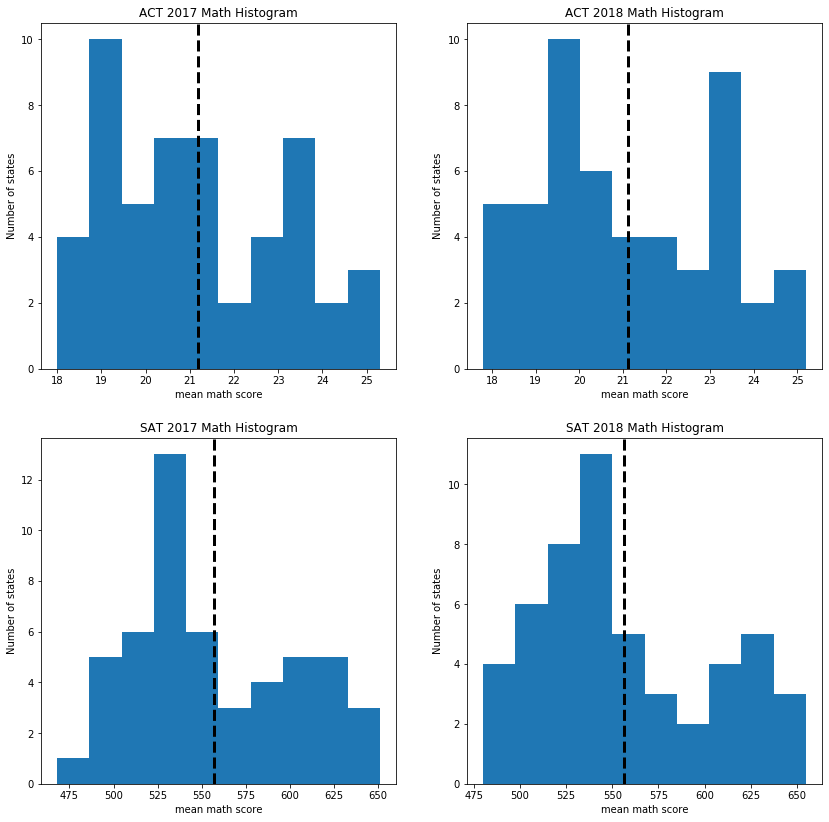

In [94]:
# math sat & act
participation_list_col = ['act_2017_math','act_2018_math','sat_2017_math','sat_2018_math']
participation_list_titles = ['ACT 2017 Math Histogram','ACT 2018 Math Histogram','SAT 2017 Math Histogram','SAT 2018 Math Histogram']
subplot_histograms(final, 
                   participation_list_col,
                   participation_list_titles,
                   'mean math score')

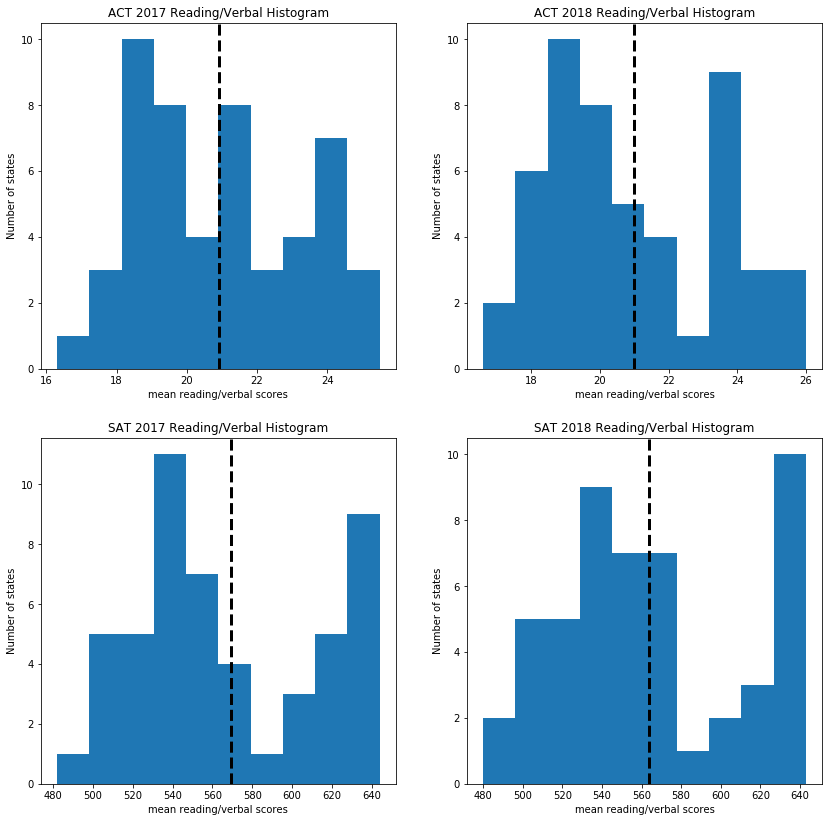

In [95]:
# reading/verbal scores sat & act
participation_list_col = ['act_2017_english','act_2018_english','sat_2017_reading_writing','sat_2018_reading_writing']
participation_list_titles = ['ACT 2017 Reading/Verbal Histogram','ACT 2018 Reading/Verbal Histogram','SAT 2017 Reading/Verbal Histogram','SAT 2018 Reading/Verbal Histogram']
subplot_histograms(final, 
                   participation_list_col,
                   participation_list_titles,
                   'mean reading/verbal scores')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [96]:
def plot_scatter(dataframe, x, y, title):
    fig = px.scatter(final, x=x, y=y, hover_data=['state'], template='seaborn', title=title)
    fig.show("png")   


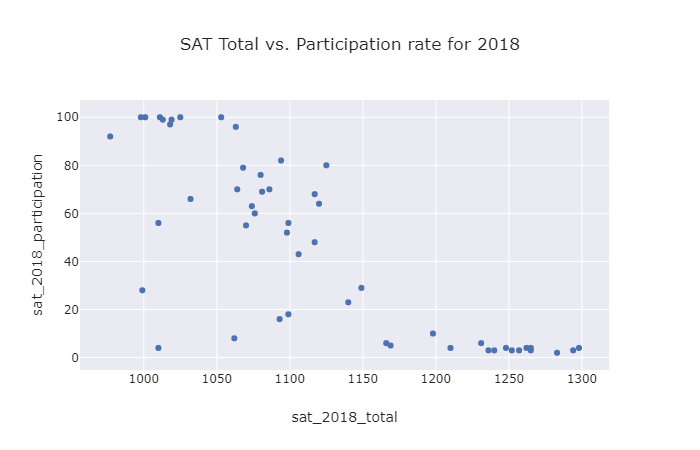

In [97]:
plot_scatter(final, 'sat_2018_total', 'sat_2018_participation', 'SAT Total vs. Participation rate for 2018')

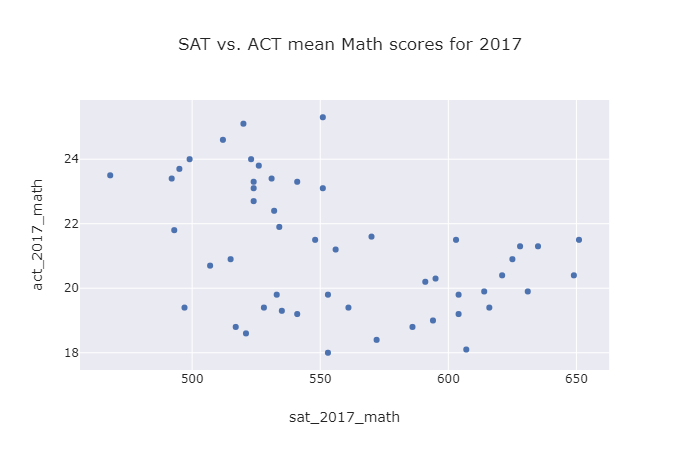

In [98]:
plot_scatter(final, 'sat_2017_math', 'act_2017_math', 'SAT vs. ACT mean Math scores for 2017')

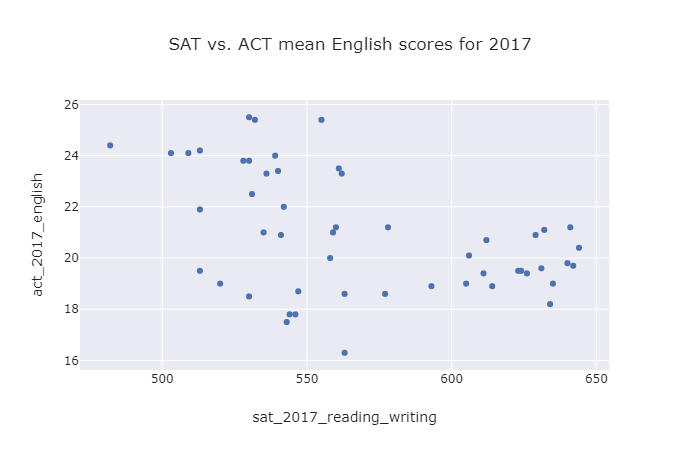

In [99]:
plot_scatter(final, 'sat_2017_reading_writing', 'act_2017_english', 'SAT vs. ACT mean English scores for 2017')

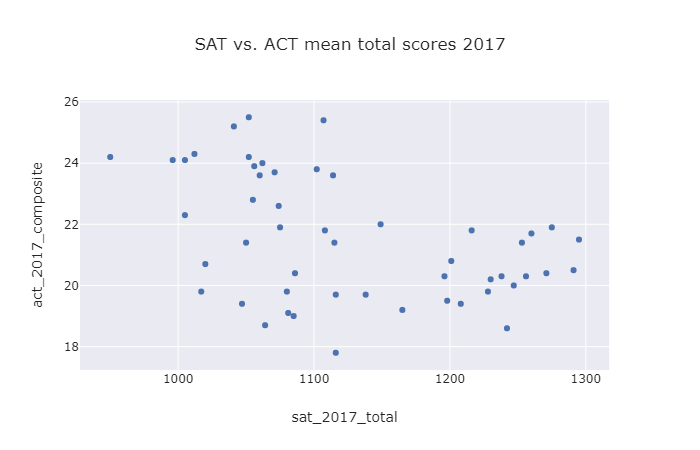

In [100]:
plot_scatter(final, 'sat_2017_total', 'act_2017_composite', 'SAT vs. ACT mean total scores 2017')

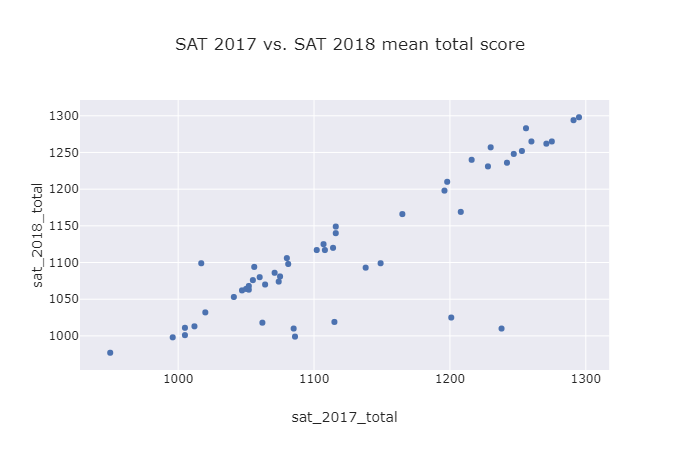

In [101]:
plot_scatter(final, 'sat_2017_total', 'sat_2018_total', 'SAT 2017 vs. SAT 2018 mean total score' )

We observe a huge decrease in SAT score from year 2017 to year 2018 for Utah, Colorado and Illinois. These are the outliers

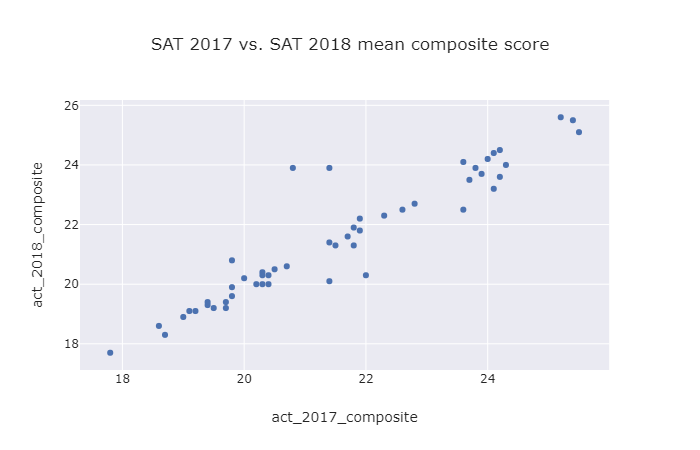

In [102]:
plot_scatter(final, 'act_2017_composite', 'act_2018_composite','SAT 2017 vs. SAT 2018 mean composite score')

We observe a huge increase in ACT composite score from year 2017 to year 2018 for Colorado and Illinois. These are the outliers

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [103]:
def plot_box(data, arr ,title, ylabel):
    plt.figure(figsize=(16,9))
    sns.set(style="whitegrid")
    plt.title(title)
    plt.ylabel(ylabel)
    ax = sns.boxplot(data=final[arr], width=0.4)

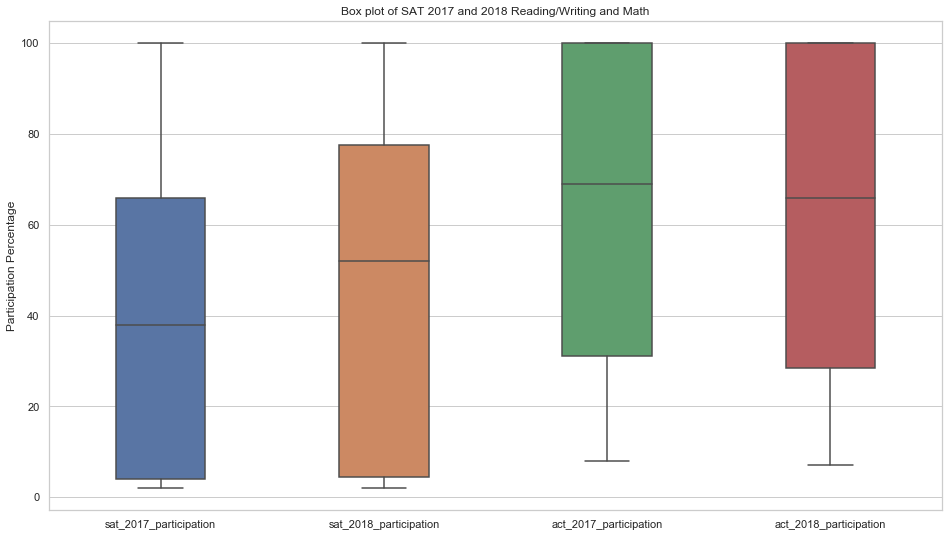

In [104]:
plot_box(final, ['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation'], 'Box plot of SAT 2017 and 2018 Reading/Writing and Math', 'Participation Percentage')

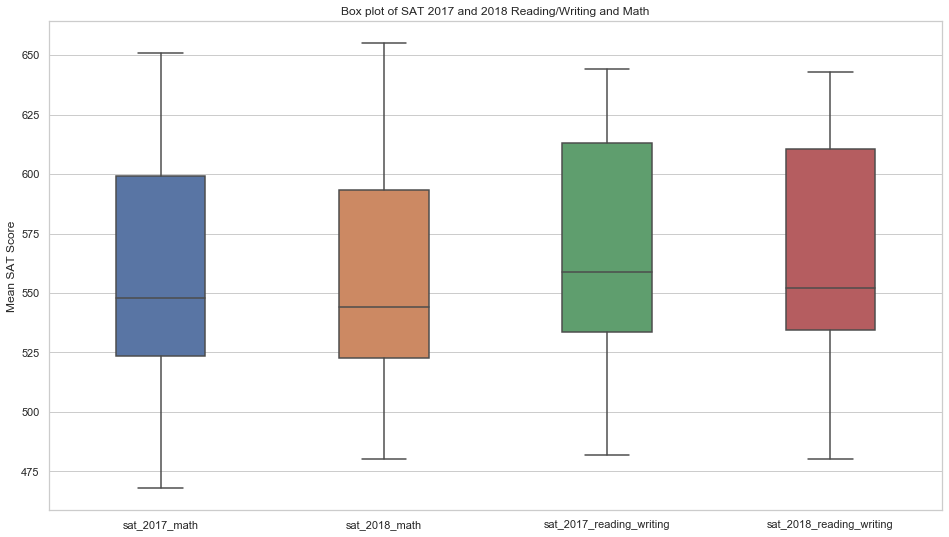

In [105]:
plot_box(final, ['sat_2017_math','sat_2018_math','sat_2017_reading_writing','sat_2018_reading_writing'], 'Box plot of SAT 2017 and 2018 Reading/Writing and Math', 'Mean SAT Score')

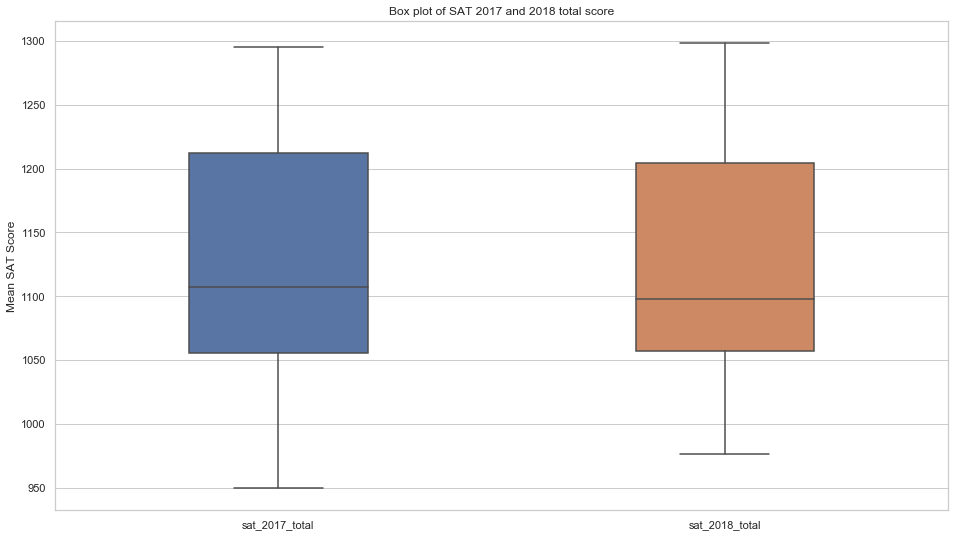

In [106]:
plot_box(final, ['sat_2017_total', 'sat_2018_total'], 'Box plot of SAT 2017 and 2018 total score', 'Mean SAT Score')

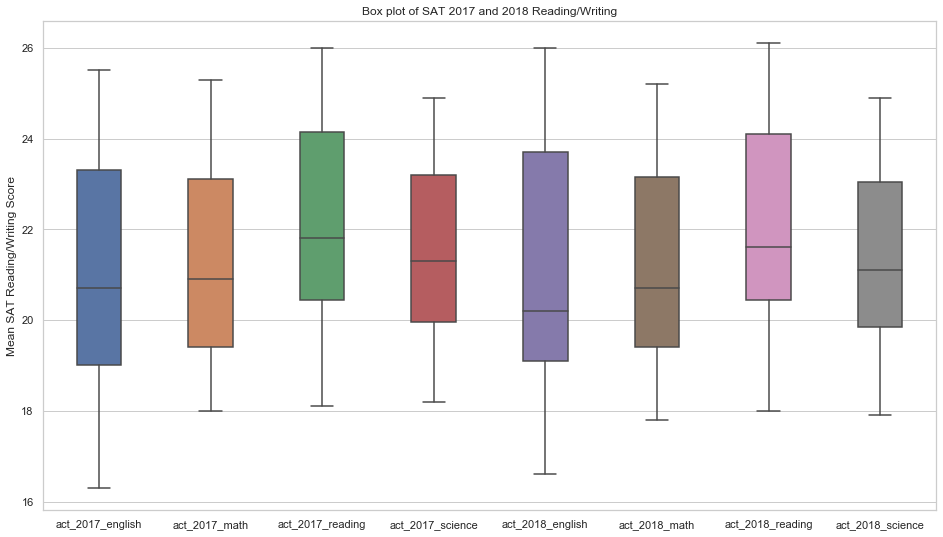

In [107]:
plot_box(final, ['act_2017_english','act_2017_math','act_2017_reading','act_2017_science',
                 'act_2018_english','act_2018_math','act_2018_reading','act_2018_science'], 
         'Box plot of SAT 2017 and 2018 Reading/Writing', 
         'Mean SAT Reading/Writing Score')

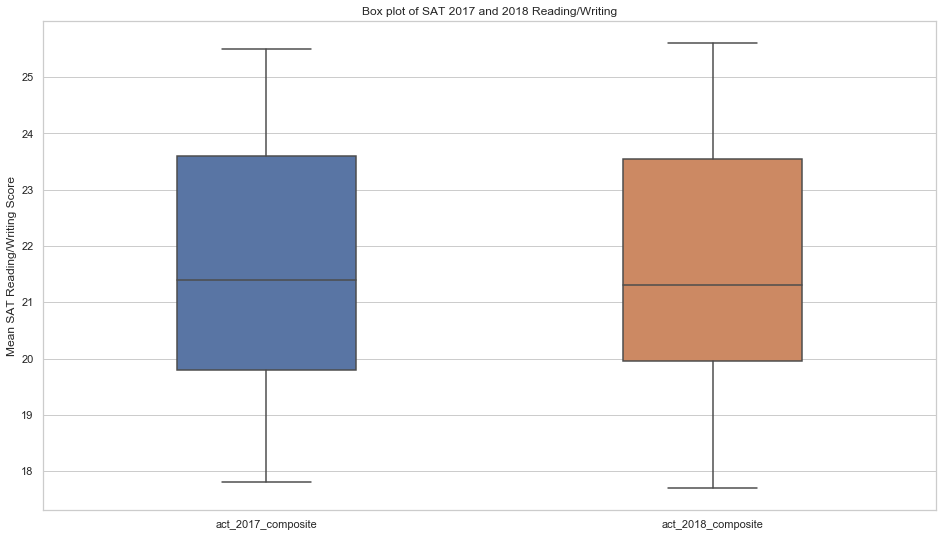

In [108]:
plot_box(final, ['act_2017_composite', 'act_2018_composite'], 'Box plot of SAT 2017 and 2018 Reading/Writing', 'Mean SAT Reading/Writing Score')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Slope graph to find the rate of change in SAT and ACT 2017 to 2018 participation rates

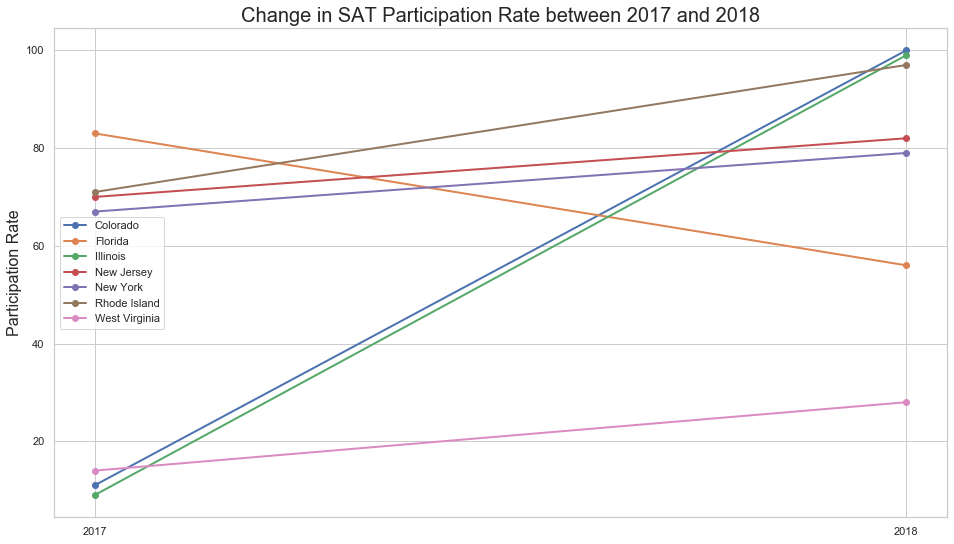

In [109]:
plt.figure(figsize=(16, 9))

# Create line plot of all stock volumes over 2012.
for i in list(final['state']):
    if abs(final[final['state'] == i]['sat_2017_participation'].iloc[0] - final[final['state'] == i]['sat_2018_participation'].iloc[0]) > 10:
        plt.plot([str(2017),str(2018)], 
                 [final[final['state'] == i]['sat_2017_participation'].iloc[0],final[final['state'] == i]['sat_2018_participation'].iloc[0]],
                 marker='o', lw=2,
                 label = i)
    
plt.legend(loc = 'best')
plt.title('Change in SAT Participation Rate between 2017 and 2018', fontsize = 20, fontweight=4)
plt.ylabel("Participation Rate", fontsize = 16);

Colorado and Illinois has huge increase in SAT participation rates

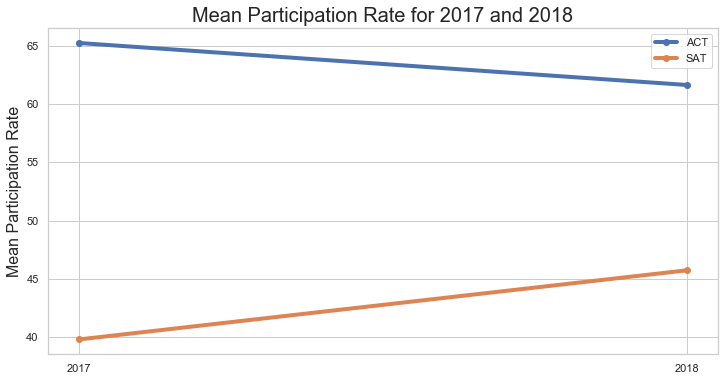

In [110]:
plt.figure(figsize=(12,6))
plt.plot([str(2017),str(2018)], 
                 [final['act_2017_participation'].mean(),final['act_2018_participation'].mean()],
                 marker='o', linewidth = 4,
                 label = 'ACT')
plt.plot([str(2017),str(2018)], 
                 [final['sat_2017_participation'].mean(),final['sat_2018_participation'].mean()],
                 marker='o', linewidth = 4,
                 label = 'SAT')
    
plt.legend(loc = 'best')
plt.title('Mean Participation Rate for 2017 and 2018',  fontsize = 20)
plt.ylabel("Mean Participation Rate", fontsize = 16);

Mean Participation Change for SAT and ACT

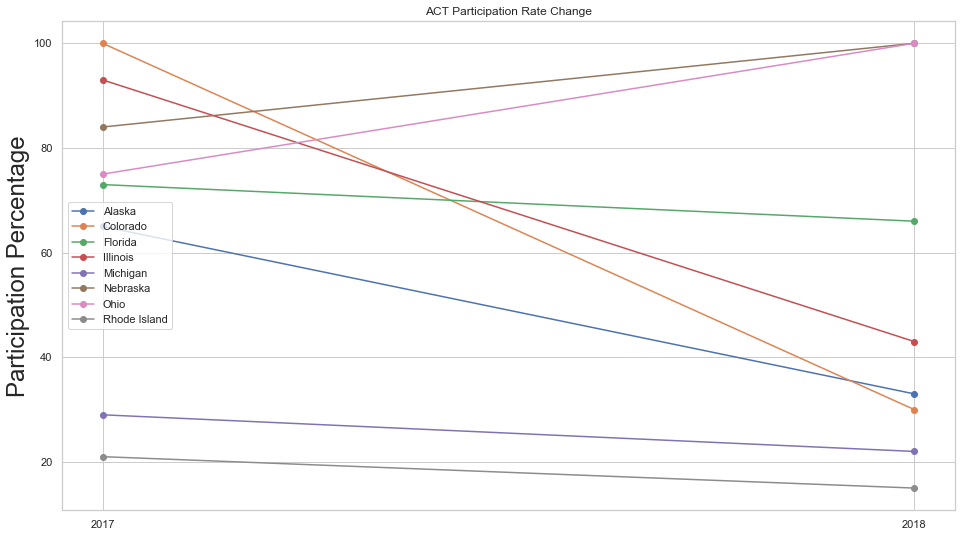

In [111]:
plt.figure(figsize=(16, 9))

# Create line plot of all stock volumes over 2012.
for i in list(final['state']):
    if abs(final[final['state'] == i]['act_2017_participation'].iloc[0] - final[final['state'] == i]['act_2018_participation'].iloc[0]) > 5:
        plt.plot([str(2017),str(2018)], 
                 [final[final['state'] == i]['act_2017_participation'].iloc[0],final[final['state'] == i]['act_2018_participation'].iloc[0]],
                 marker='o',
                 label = i)
    
plt.legend(loc = 'best')
plt.title('ACT Participation Rate Change')
plt.ylabel("Participation Percentage", fontsize = 24);

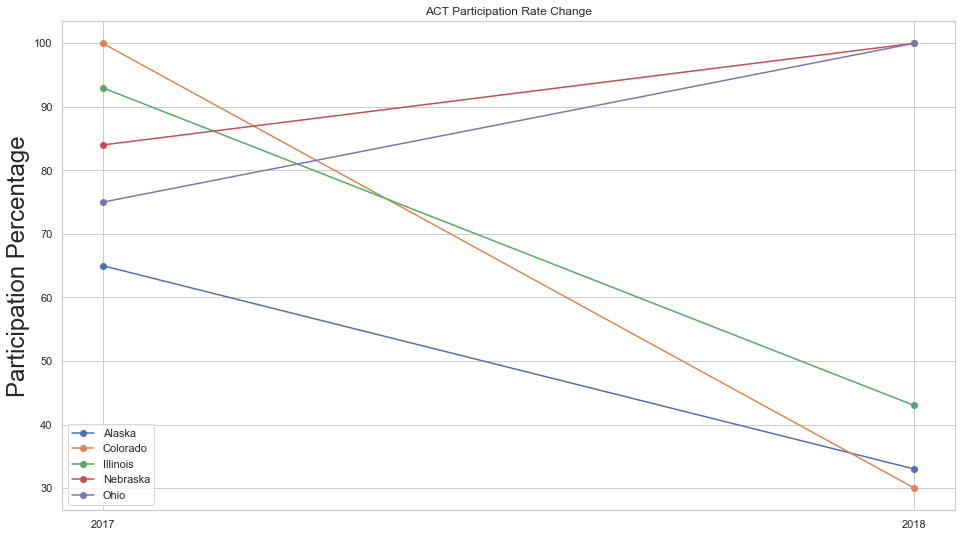

In [112]:
plt.figure(figsize=(16, 9))

# Create line plot of all stock volumes over 2012.
for i in list(final['state']):
    if abs(final[final['state'] == i]['act_2017_participation'].iloc[0] - final[final['state'] == i]['act_2018_participation'].iloc[0]) > 10:
        plt.plot([str(2017),str(2018)], 
                 [final[final['state'] == i]['act_2017_participation'].iloc[0],final[final['state'] == i]['act_2018_participation'].iloc[0]],
                 marker='o',
                 label = i)
    
plt.legend(loc = 'best')
plt.title('ACT Participation Rate Change')
plt.ylabel("Participation Percentage", fontsize = 24);

Colorado and Illinois has huge decrease in ACT participation rates

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [113]:
with open('../data/us_state_code.json') as json_file:
    us_state_code = json.load(json_file)

In [114]:
final['state_code'] = final['state'].map(lambda x: us_state_code[x])

In [115]:
def plot_choropleth(data, colname, title, colorbar_title):
    fig = go.Figure(data=go.Choropleth(
    locations=data['state_code'], # Spatial coordinates
    z = data[colname].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'RdBu',
    colorbar_title = colorbar_title))

    fig.update_layout(
        title_text = title,
        geo_scope='usa', # limite map scope to USA
    )

    fig.show("png")

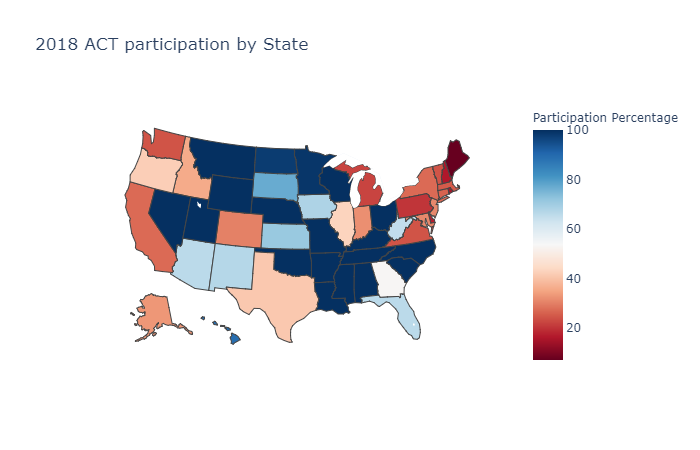

In [116]:
plot_choropleth(final, 'act_2018_participation', '2018 ACT participation by State', 'Participation Percentage')

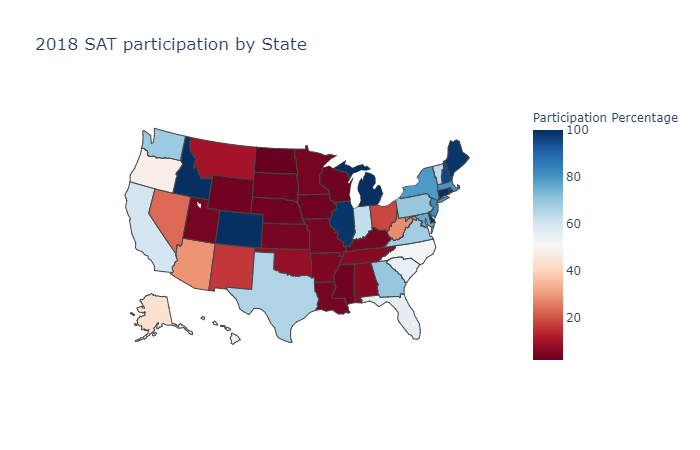

In [117]:
plot_choropleth(final, 'sat_2018_participation', '2018 SAT participation by State', 'Participation Percentage')

The colors of SAT and ACT are inverted as expected.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [118]:
final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


In [119]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_2017_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017_reading_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


- The distribution for ACT participation rates are skewed left and the distribution for SAT participation rates are skewed right for both years. ACT participation is higher than SAT.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis.

In [120]:
alpha = 0.05

In [121]:
# null hypothesis: x comes from a normal distribution
normal_distributed = {col: stats.normaltest(final[col])[1] for col in final.columns 
                      if col!='state' and col!='state_code' and stats.normaltest(final[col])[1] > alpha }
normal_distributed

{'act_2017_english': 0.08434764489205682,
 'act_2017_science': 0.06388547443366324,
 'sat_2017_math': 0.056072998982864684,
 'sat_2018_math': 0.08866620599134843}

In [122]:
# null hypothesis: x comes from a normal distribution
not_normal_distributed = {col: stats.normaltest(final[col])[1] for col in final.columns 
                          if col!='state' and col!='state_code' and stats.normaltest(final[col])[1] < alpha }
not_normal_distributed

{'act_2017_participation': 1.8018419611696254e-16,
 'act_2017_math': 0.03786805958606832,
 'act_2017_reading': 0.04396683079879635,
 'act_2017_composite': 0.03767739587231253,
 'sat_2017_participation': 4.028943345766873e-06,
 'sat_2017_reading_writing': 0.0009986795076584,
 'sat_2017_total': 0.008200230814088539,
 'act_2018_participation': 1.1798576998141957e-31,
 'act_2018_english': 0.011118664949764285,
 'act_2018_math': 0.008678423456739134,
 'act_2018_reading': 0.009055804952130748,
 'act_2018_science': 0.010625933240751445,
 'act_2018_composite': 0.012862760086159716,
 'sat_2018_participation': 3.739999415853251e-12,
 'sat_2018_reading_writing': 0.01822276093099164,
 'sat_2018_total': 0.014558724804979849}

Most of the data are not normally distributed. This will affect estimates when the estimates requires a normally destributed data.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It is not possible as we do not know the population sample size of each state. In addition, there are state where students can take both SAT and ACT test. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Not appropriate. Both of them have different score scale.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [123]:
final.set_index('state').loc[['Colorado', 'Illinois', 'Florida', 'Rhode Island', 'Utah'],
                             ['act_2017_participation', 'act_2018_participation',
                              'sat_2017_participation', 'sat_2018_participation']]

,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation
state,,,,
Colorado,100,30,11,100
Illinois,93,43,9,99
Florida,73,66,83,56
Rhode Island,21,15,71,97
Utah,100,100,3,4


- Colorado students' participation for ACT decreased 70% from 100% in 2017 to 30 % in 2018. These students went to take SAT and the SAT participation rate for Colorado increased 89% from 11% in 2017 to 100% in 2018. This is due to new contract acquired by SAT. This also result in decrease in the mean SAT total score, from 1201 to 1025 as well as an increase in the composite ACT score, from 20.8 to 23.9 from year 2017 to 2018.

- Similarly for Illinois students' participation for ACT decreased 53% from 93% in 2017 to 40 % in 2018. These students went to take SAT and the SAT participation rate increased 90% from 9% in 2017 to 99% in 2018. This is due to the new contract acquired by SAT, similar to Colorado. This also result in decrease in the mean SAT total score, from 1115to 1019 as well as an increase in the composite ACT score, from 21.4 to 23.9 from year 2017 to 2018.

- Florida, Georgia, Hawaii students have almost equal amount of students participating in SAT and ACT
- Rhode Island also has increase in SAT participation rates, from 71% to 97%
- Utah has a huge drop in SAT mean score, from 1238 to 1010


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

There is a strong competition between SAT and ACT test. In addition, state department of education have a large impact on the SAT and ACT participation rates. They can impact the participation rates by providing subsidies to students for test or making test compulsory for all students. Illinois and Colorado are examples   to it. Hence, collaboration with state education departments and colleges would lead to the increase in SAT participation rates.

There are states with equal amount of students participating in SAT and ACT such as Florida, Georgia and Hawaii. These states are recommended for state department of education to look into for for increase in SAT participation rates.